# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain yourself the purposes of the project and actions you plan to take.]

[Please bear in mind that studying, amending and analyzing data is an iterative process. It is normal to return back to previous steps and correct/expand them to allow for further steps.]

## Initialization

<s><div style="border: padding: 20px"> <b>Remarks:</b><br>
[Load libraries that you believe are required for the project. You may realise later that you need additional libraries as you go, which is totally fine - just make sure to update this section when you do.]
</div>      

In [1]:
# Loading all the libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt 

import plotly

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load data

<s><div style="border: padding: 20px"> <b>Remarks:</b><br>
[Load the project data and have a look at the general information.]
    </div> 

In [2]:
# Load the data file into a DataFrame
vehicles_us = pd.read_csv('/datasets/vehicles_us.csv')
vehicles_us.tail(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

[Understanding the fields, explore them to make yourself familiar with the data.]

In [3]:
# print the general/summary information about the DataFrame
print(vehicles_us.info())
print(vehicles_us.shape)
print(vehicles_us.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None
(51525, 13)
Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'day

In [4]:
# print a sample of data
vehicles_us.describe().T

,count,mean,std,min,25%,50%,75%,max
price,51525.0,12132.464920,10040.803015,1.0,5000.0,9000.0,16839.0,375000.0
model_year,47906.0,2009.750470,6.282065,1908.0,2006.0,2011.0,2014.0,2019.0
cylinders,46265.0,6.125235,1.660360,3.0,4.0,6.0,8.0,12.0
odometer,43633.0,115553.461738,65094.611341,0.0,70000.0,113000.0,155000.0,990000.0
is_4wd,25572.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
days_listed,51525.0,39.554760,28.204270,0.0,19.0,33.0,53.0,271.0


In [5]:
vehicles_us.describe(include="object").T

,count,unique,top,freq
model,51525,100,ford f-150,2796
condition,51525,6,excellent,24773
fuel,51525,5,gas,47288
transmission,51525,3,automatic,46902
type,51525,13,SUV,12405
paint_color,42258,12,white,10029
date_posted,51525,354,2019-03-17,186


In [6]:
vehicles_us[(vehicles_us.notna())].nunique() # the number of unique titles in every column

price            3443
model_year         68
model             100
condition           6
cylinders           7
fuel                5
odometer        17762
transmission        3
type               13
paint_color        12
is_4wd              1
date_posted       354
days_listed       227
dtype: int64

<font color='green'>
*<b> 5 columns have missing values  <br>
* yes like converting the Dates ,categorizing datas ,searching for duplicated rows...

<font color='green'>*
<b> model_year & date_posted are dates and they are not in the correct type

<font color='green'> 
<b> * no not in all of them <br>
    * missing numerical rows in model_year, cylinders, odometer, is_4wd  <br>
    * missing object rows in paint_color.<br>
    * columns contain the most missing values: is_4wd<br>

<span style="color:green; font-size: 25px">
<b> * checking duplicated

In [7]:
vehicles_us.duplicated().value_counts()

False    51525
dtype: int64

<font color='green'>*
<b> no duplicates

<h5 style="color:green; margin-bottom:20px">
<span style="color:green; font-size: 25px">
<b> * Missing Values

In [8]:
vehicles_us[vehicles_us.paint_color.isnull() 
          & vehicles_us.is_4wd.isnull() 
          & vehicles_us.odometer.isnull() 
          & vehicles_us.model_year.isnull() 
          & vehicles_us.cylinders.isnull()].count()
# missing values across all columns

price           4
model_year      0
model           4
condition       4
cylinders       0
fuel            4
odometer        0
transmission    4
type            4
paint_color     0
is_4wd          0
date_posted     4
days_listed     4
dtype: int64

In [9]:
vehicles_us[vehicles_us.paint_color.isnull() 
          & vehicles_us.is_4wd.isnull() 
          & vehicles_us.odometer.isnull() 
          & vehicles_us.model_year.isnull() 
          & vehicles_us.cylinders.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
19877,34900,NaN,mercedes-benz benze sprinter 2500,excellent,NaN,diesel,NaN,automatic,van,NaN,NaN,2018-10-16,44
20969,3000,NaN,ford focus,like new,NaN,diesel,NaN,automatic,sedan,NaN,NaN,2018-10-24,15
23376,3500,NaN,toyota 4runner,excellent,NaN,gas,NaN,automatic,SUV,NaN,NaN,2019-03-28,57
43039,4200,NaN,ford fusion,excellent,NaN,gas,NaN,automatic,sedan,NaN,NaN,2019-01-10,11


In [10]:
vehicles_us.model_year.isnull().value_counts()
vehicles_us.model_year.isnull().value_counts(1)

False    47906
True      3619
Name: model_year, dtype: int64

False    0.929762
True     0.070238
Name: model_year, dtype: float64

<font color='green'>
<b> 3619 = 7% missing values in model_year <br>
I have to restore them using condition

In [11]:
vehicles_us.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

<span style="color:green; font-size: 25px">
<b> * is_4wd

<font color='green'>*
<b> filling missing values in is_4wd with 0

In [12]:
vehicles_us.is_4wd.isnull().value_counts()

True     25953
False    25572
Name: is_4wd, dtype: int64

In [13]:
vehicles_us.is_4wd.unique()

array([ 1., nan])

In [14]:
vehicles_us.is_4wd.head() 
# with the reason that the car owners don´t fill the field of 4wd when they place the advertisment, so it should be filled with 0

0    1.0
1    1.0
2    NaN
3    NaN
4    NaN
Name: is_4wd, dtype: float64

In [15]:
vehicles_us.is_4wd.fillna(0,inplace=True)

In [16]:
vehicles_us.is_4wd.isnull().value_counts() 

False    51525
Name: is_4wd, dtype: int64

In [17]:
vehicles_us.is_4wd.unique()
vehicles_us.is_4wd = vehicles_us.is_4wd.astype('bool')

array([1., 0.])

<span style="color:green; font-size: 25px">
<b> * Missing Values

In [18]:
vehicles_us[vehicles_us.paint_color.isnull() 
          & vehicles_us.odometer.isnull() 
          & vehicles_us.model_year.isnull() 
          & vehicles_us.cylinders.isnull()].count()

price           9
model_year      0
model           9
condition       9
cylinders       0
fuel            9
odometer        0
transmission    9
type            9
paint_color     0
is_4wd          9
date_posted     9
days_listed     9
dtype: int64

<font color='green'>*
<b> Here we can see 9 rows have missing values with 4 columns together

In [19]:
vehicles_us[vehicles_us.paint_color.isnull() 
          & vehicles_us.odometer.isnull() 
          & vehicles_us.model_year.isnull() 
          & vehicles_us.cylinders.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
19877,34900,NaN,mercedes-benz benze sprinter 2500,excellent,NaN,diesel,NaN,automatic,van,NaN,False,2018-10-16,44
20662,7795,NaN,kia sorento,good,NaN,gas,NaN,automatic,SUV,NaN,True,2019-01-11,108
20969,3000,NaN,ford focus,like new,NaN,diesel,NaN,automatic,sedan,NaN,False,2018-10-24,15
23376,3500,NaN,toyota 4runner,excellent,NaN,gas,NaN,automatic,SUV,NaN,False,2019-03-28,57
37761,17995,NaN,ram 1500,excellent,NaN,gas,NaN,automatic,pickup,NaN,True,2019-02-25,28
43039,4200,NaN,ford fusion,excellent,NaN,gas,NaN,automatic,sedan,NaN,False,2019-01-10,11
44707,23586,NaN,ford edge,like new,NaN,gas,NaN,automatic,SUV,NaN,True,2018-05-05,44
44904,13995,NaN,gmc yukon,good,NaN,hybrid,NaN,automatic,SUV,NaN,True,2018-05-08,19
47139,12500,NaN,chevrolet traverse,good,NaN,gas,NaN,automatic,SUV,NaN,True,2018-06-22,35


<span style="color:green; font-size: 25px">
<b> * model_year

<font color='green'>
<b> * Here we have to replace the weird prices with the median according to the model and model_year <br>
<font color='red'>
* but since the model_year still has missing values, so it must be fixed at first

In [20]:
vehicles_us.model_year = vehicles_us.model_year.fillna(vehicles_us.groupby('condition')['model_year'].transform('median'))

In [21]:
vehicles_us.model_year.isnull().value_counts()

False    51525
Name: model_year, dtype: int64

<font color='green'>
<b> * the model_year has been fixed with the median value

<span style="color:green; font-size: 25px">
<b> * price

<font color='red'>
<b> * i have to deal now with the parameters: model & price <br>
<font color='green'>
* everything below $200 is unrealistic and we can replace that, since it's only 0.5 procent of the data <br>    
<b> * i will fill the weird values with minimum realistic price (200D).

In [22]:
vehicles_us.model_year[vehicles_us.price==1].describe()

count     798.000000
mean     2015.373434
std         4.451427
min      1966.000000
25%      2014.000000
50%      2017.000000
75%      2018.000000
max      2019.000000
Name: model_year, dtype: float64

<font color='green'>
<b> * we notice that the price of $1 is spread from 1966 - 2019

In [23]:
vehicles_us.model_year[vehicles_us.price<200].describe()

count     911.000000
mean     2015.000000
std         4.609593
min      1966.000000
25%      2014.000000
50%      2016.000000
75%      2018.000000
max      2019.000000
Name: model_year, dtype: float64

<font color='green'>
<b> * but there are more unrealistic prices spreaded across 1966 - 2019

In [24]:
print('the procentage of prices less than $200 is {:0.1%}'.format(len(vehicles_us.model_year[vehicles_us.price<200])/len(vehicles_us.model_year)))

the procentage of prices less than $200 is 1.8%


<font color='green'>
<b> * so we can modify them.

In [25]:
vehicles_us.loc[vehicles_us['price'] <200 , 'price'] = vehicles_us.groupby('model_year')['price'].transform(lambda grp: grp.median())

vehicles_us['price'][vehicles_us['price']<200].value_counts()

Series([], Name: price, dtype: int64)

<font color='green'>
<b> * it is clean and fixed now

<span style="color:green; font-size: 25px">
<b> * type

In [26]:
vehicles_us.type.unique() # to check letters case if there are duplicated: no it is clean.

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

<font color='green'>
<b> * to check letters case if there are duplicated: no it is clean.

<span style="color:green; font-size: 25px">
<b> * paint_color

In [27]:
vehicles_us.paint_color.isnull().value_counts()
vehicles_us.paint_color.isnull().value_counts(1)

False    42258
True      9267
Name: paint_color, dtype: int64

False    0.820146
True     0.179854
Name: paint_color, dtype: float64

In [28]:
vehicles_us.paint_color.unique()
print('the number of unique paint_color is:',vehicles_us.paint_color.nunique())

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

the number of unique paint_color is: 12


In [29]:
vehicles_us.paint_color.fillna('other',inplace=True)
vehicles_us.paint_color.isnull().value_counts()

False    51525
Name: paint_color, dtype: int64

<span style="color:green; font-size: 25px">
<b> * odometer

In [30]:
vehicles_us.odometer.describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [31]:
vehicles_us.odometer.unique()
vehicles_us.odometer.nunique()

array([145000.,  88705., 110000., ..., 121778., 181500., 139573.])

17762

In [32]:
vehicles_us.odometer.isnull().value_counts()
vehicles_us.odometer.isnull().value_counts(1)

False    43633
True      7892
Name: odometer, dtype: int64

False    0.846832
True     0.153168
Name: odometer, dtype: float64

<font color='green'>
<b> * filling missing values with median according condition column.

In [33]:
#vehicles_us.odometer.fillna(odo_median,inplace=True)
vehicles_us.odometer = vehicles_us.odometer.fillna(vehicles_us.groupby('condition')['odometer'].transform('median'))
vehicles_us.odometer.isnull().value_counts()

False    51525
Name: odometer, dtype: int64

<font color='green'>
<b> * then filling the odometer values under 50 where the model less than 2018 with median of odometer.

In [34]:
vehicles_us.loc[(vehicles_us['odometer'] <50) & (vehicles_us['model_year'] <2018), 'odometer'] = vehicles_us.groupby('model')['odometer'].transform(lambda grp: grp.median())
vehicles_us.odometer.isnull().value_counts()

False    51525
Name: odometer, dtype: int64

<font color='green'>
<b> * odometer missing values cleaned.

<span style="color:green; font-size: 25px">
<b> * cylinders

In [35]:
vehicles_us.cylinders.unique()
vehicles_us.cylinders.nunique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

7

In [36]:
vehicles_us.cylinders.isnull().value_counts()
vehicles_us.cylinders.isnull().value_counts(1)

False    46265
True      5260
Name: cylinders, dtype: int64

False    0.897914
True     0.102086
Name: cylinders, dtype: float64

In [37]:
vehicles_us.cylinders.describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [38]:
vehicles_us.cylinders.value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [39]:
#vehicles_us.cylinders.fillna(cylind_med,inplace=True)
vehicles_us.cylinders = vehicles_us.cylinders.fillna(vehicles_us.groupby('model')['cylinders'].transform('median'))

In [40]:
vehicles_us.cylinders.value_counts()

8.0     17712
6.0     17435
4.0     15499
10.0      549
5.0       294
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [41]:
vehicles_us.cylinders.isnull().value_counts()

False    51525
Name: cylinders, dtype: int64

<font color='green'>
<b> * cylinders missing values filled with median.

### Conclusions and further steps

[Formulate your conclusions regarding the initial data. What do you think looks normal and what does not?]

[Explain your next steps and how they correlate with the conclusions you made so far. Specifically, it should be clear what part of data should be treated to make it more suitable for the required analysis.]

In [42]:
vehicles_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  float64
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 4.8+ MB


In [43]:
vehicles_us.model_year.head()

0    2011.0
1    2009.0
2    2013.0
3    2003.0
4    2017.0
Name: model_year, dtype: float64

<span style="color:green; font-size: 25px">
<b> * Missing Values cleaned

## Treat missing values (if any)

## Fix data types

<span style="color:green; font-size: 25px">
<b> * Dates Type

[As the data is more or less complete now, fix the data types if required.]

In [44]:
#vehicles_us.model_year=pd.to_datetime(vehicles_us.model_year,format='%Y')
vehicles_us.date_posted=pd.to_datetime(vehicles_us.date_posted)

In [45]:
vehicles_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  float64       
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 4.8+ MB


<s><div style="border: padding: 20px"> <b>Remarks:</b><br>
<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>


Great that you checked data types. One minor remark here is that you can change is_4wd to bool type, as it contains only 0/1 values. 

<font color='green'>
<b> * fixed.

<div style="border:solid magenta 2px; padding: 20px"> <b></b><br>
    

## Enrich data

<span style="color:green; font-size: 25px">
<b> * datetime

<s><div style="border: padding: 20px"> 
[Add additional factors to the data to make the analysis easier.]

In [46]:
# Add datetime values for when the ad was placed
vehicles_us['posted_day']=pd.DatetimeIndex(vehicles_us.date_posted).day
vehicles_us['posted_month']=pd.DatetimeIndex(vehicles_us.date_posted).month
vehicles_us['posted_year']=pd.DatetimeIndex(vehicles_us.date_posted).year
vehicles_us.info()
#vehicles_us['datetime']=vehicles_us.date_posted+vehicles_us.days_listed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  float64       
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  posted_day    51525 non-null  int64         
 14  posted_month  51525 non-null  int64         
 15  posted_year   51525 non-null  int64 

<font color='green'>
<b> * fixed.

<div style="border:solid magenta 2px; padding: 20px"> <b></b><br>
    

<span style="color:green; font-size: 25px">
<b> * vehicle's age

In [47]:
# Add the vehicle's age when the ad was placed
vehicles_us['vehicle_age']=(vehicles_us.posted_year)-(vehicles_us.model_year)+1

<s><div style="border: padding: 20px">
<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
Here as a second approach you can also add  +1 to the equation above to take into account the current year. Otherwise, it will lead to multiple 0 in `vehicle_age` (as below) and as a result infinite values in `avg_mileage`. 
    
    
Btw you can omit print() here, as jupyter automatically provides correct output. 


<font color='green'>
<b> * fixed.

<div style="border:solid magenta 2px; padding: 20px"> <b></b><br>
    

<span style="color:green; font-size: 25px">
<b> * vehicle's average mileage per year

In [48]:
# Add the vehicle's average mileage per year
vehicles_us['av_mileage']=vehicles_us.odometer/vehicles_us.vehicle_age

In [49]:
vehicles_us.av_mileage=pd.to_numeric(vehicles_us.av_mileage)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
    
- Here smth went wrong with your code. Can you please check it?
- I can recommend you to always run your project once again on the customer's servers before submitting your work to avoid possible errors. You can do that using: Kernel -> Restart & run all. <br>
    
<b> I am wondering for this failure and the all empty results all over the rest of the project, realy I had run it befor sending it, and it was all ok without errors!!!, I don't know what happend    
    

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
If a recall correctly, a different dataframe has been used. But anyway, thanks for fixing that! Now everything works perfectly fine.
</div>

In [50]:
vehicles_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  float64       
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  posted_day    51525 non-null  int64         
 14  posted_month  51525 non-null  int64         
 15  posted_year   51525 non-null  int64 

In [51]:
vehicles_us.av_mileage.isnull().value_counts()

False    51525
Name: av_mileage, dtype: int64

<font color='green'>
<b> * fixed.

<div style="border:solid magenta 2px; padding: 20px"> <b></b><br>
    

<span style="color:green; font-size: 25px">
<b> * replace the condition

In [52]:
# It might help to replace the condition values with something that can be manipulated more easily
replacement_dict = {'salvage':0,'fair':1,'good':2,'excellent':3,'like new':4,'new':5}
MM=vehicles_us['condition'].map(replacement_dict)
vehicles_us['condition']=MM

In [53]:
vehicles_us['condition'].nunique()

6

<s><div style="border: padding: 20px">
First of all, you have got to create such a dictionary 
replacement_dict = {'good':4, ...}
df['col']df['col'].map(replacement_dict)

In [54]:
vehicles_us.condition.unique()

array([2, 4, 1, 3, 0, 5])

<font color='green'>
<b> * fixed.

<div style="border:solid magenta 2px; padding: 20px"> <b></b><br>
    

## Check clean data

<s><div style="border: padding: 20px">
[Given the data is ready for the analysis, take just another quick look at it. It is helpful to see what exactly you are going to use for the analysis.]

In [55]:
# print the general/summary information about the DataFrame
vehicles_us.describe().T
vehicles_us.describe(include="object")

,count,mean,std,min,25%,50%,75%,max
price,51525.0,12445.873188,9964.783146,200.0,5490.0,9650.000000,16998.000,375000.0
model_year,51525.0,2009.816419,6.091605,1908.0,2007.0,2011.000000,2014.000,2019.0
condition,51525.0,2.637535,0.712447,0.0,2.0,3.000000,3.000,5.0
cylinders,51525.0,6.121067,1.657457,3.0,4.0,6.000000,8.000,12.0
odometer,51525.0,115704.523086,59994.398398,0.0,76880.0,111349.000000,147821.000,990000.0
days_listed,51525.0,39.554760,28.204270,0.0,19.0,33.000000,53.000,271.0
posted_day,51525.0,15.449491,8.736521,1.0,8.0,15.000000,23.000,31.0
posted_month,51525.0,6.628491,3.474134,1.0,3.0,7.000000,10.000,12.0
posted_year,51525.0,2018.307462,0.461447,2018.0,2018.0,2018.000000,2019.000,2019.0
vehicle_age,51525.0,9.491043,6.105618,1.0,5.0,8.000000,13.000,111.0


,model,fuel,transmission,type,paint_color
count,51525,51525,51525,51525,51525
unique,100,5,3,13,13
top,ford f-150,gas,automatic,SUV,white
freq,2796,47288,46902,12405,10029


In [56]:
# print a sample of data
vehicles_us.info()
vehicles_us.head()
vehicles_us.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  float64       
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  posted_day    51525 non-null  int64         
 14  posted_month  51525 non-null  int64         
 15  posted_year   51525 non-null  int64 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,posted_day,posted_month,posted_year,vehicle_age,av_mileage
0,9400.0,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,other,True,2018-06-23,19,23,6,2018,8.0,18125.000000
1,25500.0,2009.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,19,10,2018,10.0,8870.500000
2,5500.0,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,7,2,2019,7.0,15714.285714
3,1500.0,2003.0,ford f-150,1,8.0,gas,181613.0,automatic,pickup,other,False,2019-03-22,9,22,3,2019,17.0,10683.117647
4,14900.0,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,4,2019,3.0,26967.666667


price            3405
model_year         68
model             100
condition           6
cylinders           7
fuel                5
odometer        17769
transmission        3
type               13
paint_color        13
is_4wd              2
date_posted       354
days_listed       227
posted_day         31
posted_month       12
posted_year         2
vehicle_age        68
av_mileage      23545
dtype: int64

<font color='green'>
<b> * fixed.

<div style="border:solid magenta 2px; padding: 20px"> <b></b><br>
    

## Study core parameters
<s><div style="border: padding: 20px">
[Choose an appropriate approach to study the parameters listed below, pay special attention to how outliers affect the form and readability of the histograms.]

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

In [57]:
df=vehicles_us

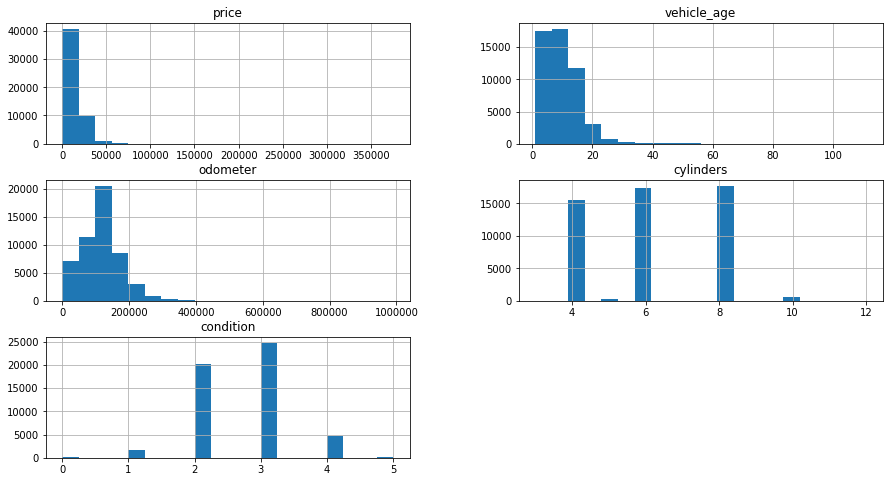

In [58]:
df[['price','vehicle_age','odometer','cylinders','condition']].hist(bins=20,figsize=(15,8));

[If you find that you need to repeat the same jobs multiple times, think about what coding instrument might be helpful for such a thing to avoid duplicating your code.]

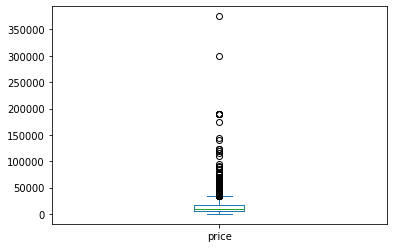

In [59]:
df.price.plot(kind="box");

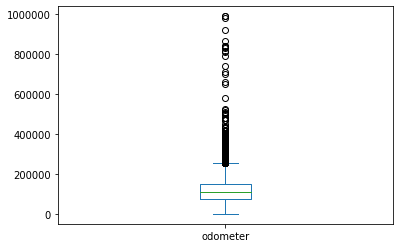

In [60]:
df.odometer.plot(kind="box");

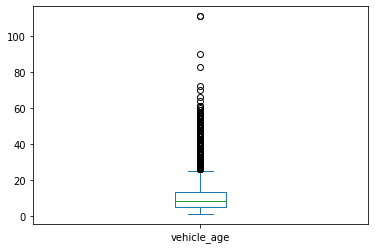

In [61]:
df.vehicle_age.plot(kind="box");

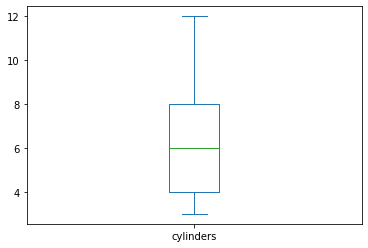

In [62]:
df.cylinders.plot(kind="box");

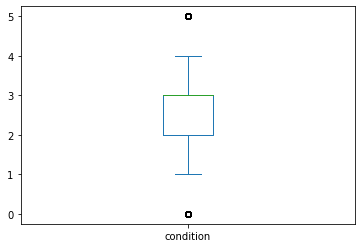

In [63]:
df.condition.plot(kind="box");

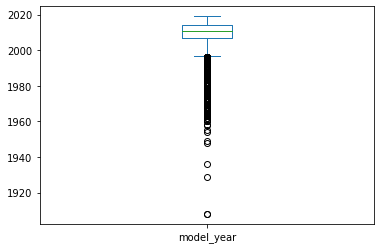

In [64]:
df.model_year.plot(kind="box");

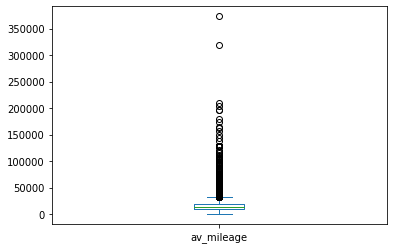

In [65]:
df.av_mileage.plot(kind="box");

## Study and treat outliers

[Given the results above, determine what columns may contain outliers, and create a DataFrame without those outliers. Hint: Outliers can be identified by defining the lower/upper limits for normal range of values.]

In [66]:
# Determine the lower limits for outliers
#np.percentile(df.price,2)
new_df=df

In [67]:
def dist_IQR(para):
    Q1 = df[para].quantile(0.25)
    Q3 = df[para].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr =Q1-1.5*IQR
    max_iqr =Q3+1.5*IQR
    print('Q1',Q1)
    print('Q3',Q3)
    print('min_iqr',min_iqr)
    print('max_iqr',max_iqr)
    print('The histogram of: {}'.format(para))
    df[para].hist()
    plt.show()
    if df[para].mean()>df[para].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('statictics on: {}'.format(para))
    print(df[para].describe())
    print('---------------------------------------')
    print('min border:',min_iqr)
    print('max border:',max_iqr)
    print('---------------------------------------')
    if min_iqr<0:
        print('The outliers are considered to be values above',max_iqr)
        print('we have',len(df[df[para]>max_iqr]),'values that we can consider outliers')
    else:
        print('The outliers are considered to be values below',min_iqr,'and above',max_iqr)
        print('we have',len(df[(df[para]<min_iqr) | (df[para]>max_iqr)]),'values that we can consider outliers')

Q1 5490.0
Q3 16998.0
min_iqr -11772.0
max_iqr 34260.0
The histogram of: price


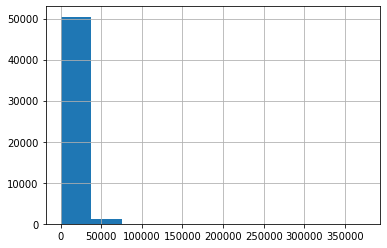

The distribution is skewed to the right
---------------------------------------
statictics on: price
count     51525.000000
mean      12445.873188
std        9964.783146
min         200.000000
25%        5490.000000
50%        9650.000000
75%       16998.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
min border: -11772.0
max border: 34260.0
---------------------------------------
The outliers are considered to be values above 34260.0
we have 1696 values that we can consider outliers


In [68]:
dist_IQR('price')
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
max_iqr =Q3+1.5*IQR
new_df=new_df[new_df.price < max_iqr]

Q1 5.0
Q3 13.0
min_iqr -7.0
max_iqr 25.0
The histogram of: vehicle_age


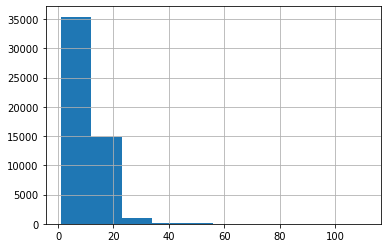

The distribution is skewed to the right
---------------------------------------
statictics on: vehicle_age
count    51525.000000
mean         9.491043
std          6.105618
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max        111.000000
Name: vehicle_age, dtype: float64
---------------------------------------
min border: -7.0
max border: 25.0
---------------------------------------
The outliers are considered to be values above 25.0
we have 737 values that we can consider outliers


In [69]:
dist_IQR('vehicle_age')
Q1 = df['vehicle_age'].quantile(0.25)
Q3 = df['vehicle_age'].quantile(0.75)
IQR = Q3 - Q1
max_iqr =Q3+1.5*IQR
new_df=new_df[new_df.vehicle_age<max_iqr]

Q1 76880.0
Q3 147821.0
min_iqr -29531.5
max_iqr 254232.5
The histogram of: odometer


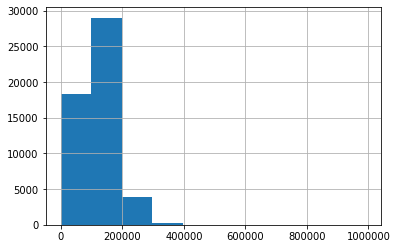

The distribution is skewed to the right
---------------------------------------
statictics on: odometer
count     51525.000000
mean     115704.523086
std       59994.398398
min           0.000000
25%       76880.000000
50%      111349.000000
75%      147821.000000
max      990000.000000
Name: odometer, dtype: float64
---------------------------------------
min border: -29531.5
max border: 254232.5
---------------------------------------
The outliers are considered to be values above 254232.5
we have 967 values that we can consider outliers


In [70]:
dist_IQR('odometer')
Q1 = df['odometer'].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)
IQR = Q3 - Q1
max_iqr =Q3+1.5*IQR
new_df=new_df[new_df.odometer<max_iqr]

Q1 4.0
Q3 8.0
min_iqr -2.0
max_iqr 14.0
The histogram of: cylinders


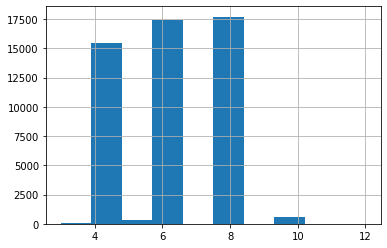

The distribution is skewed to the right
---------------------------------------
statictics on: cylinders
count    51525.000000
mean         6.121067
std          1.657457
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
---------------------------------------
min border: -2.0
max border: 14.0
---------------------------------------
The outliers are considered to be values above 14.0
we have 0 values that we can consider outliers


In [71]:
dist_IQR('cylinders')
Q1 = df['cylinders'].quantile(0.25)
Q3 = df['cylinders'].quantile(0.75)
IQR = Q3 - Q1
max_iqr =Q3+1.5*IQR
new_df=new_df[new_df.cylinders<max_iqr]

Q1 2.0
Q3 3.0
min_iqr 0.5
max_iqr 4.5
The histogram of: condition


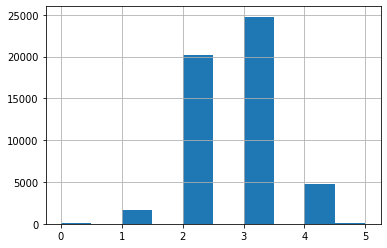

The distribution is skewed to the left
---------------------------------------
statictics on: condition
count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64
---------------------------------------
min border: 0.5
max border: 4.5
---------------------------------------
The outliers are considered to be values below 0.5 and above 4.5
we have 258 values that we can consider outliers


In [72]:
dist_IQR('condition')
Q1 = df['condition'].quantile(0.25)
Q3 = df['condition'].quantile(0.75)
IQR = Q3 - Q1
min_iqr =Q1-1.5*IQR
max_iqr =Q3+1.5*IQR
new_df=new_df[(new_df.condition<max_iqr) & (new_df.condition>min_iqr)]

In [73]:
# Store data without outliers in a separate DataFrame
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47860 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         47860 non-null  float64       
 1   model_year    47860 non-null  float64       
 2   model         47860 non-null  object        
 3   condition     47860 non-null  int64         
 4   cylinders     47860 non-null  float64       
 5   fuel          47860 non-null  object        
 6   odometer      47860 non-null  float64       
 7   transmission  47860 non-null  object        
 8   type          47860 non-null  object        
 9   paint_color   47860 non-null  object        
 10  is_4wd        47860 non-null  bool          
 11  date_posted   47860 non-null  datetime64[ns]
 12  days_listed   47860 non-null  int64         
 13  posted_day    47860 non-null  int64         
 14  posted_month  47860 non-null  int64         
 15  posted_year   47860 non-null  int64 

In [74]:
1-(len(new_df)/len(df))

0.07113051916545365

In [75]:
# Determine the upper limits for outliers - 

# the percentage between the early (with outliers) and the new case (without outliers) is almost 7%,
# so that refers that we can continue using the new case.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Well done! You perfectly identified and handled outliers. You can additionally check a nice article about working with outliers:
- https://www.pluralsight.com/guides/cleaning-up-data-from-outliers
</div>

## Study core parameters without outliers

[Use the filtered data to make new plots. Compare with the earlier ones (that included outliers). Draw conclusions for each.]

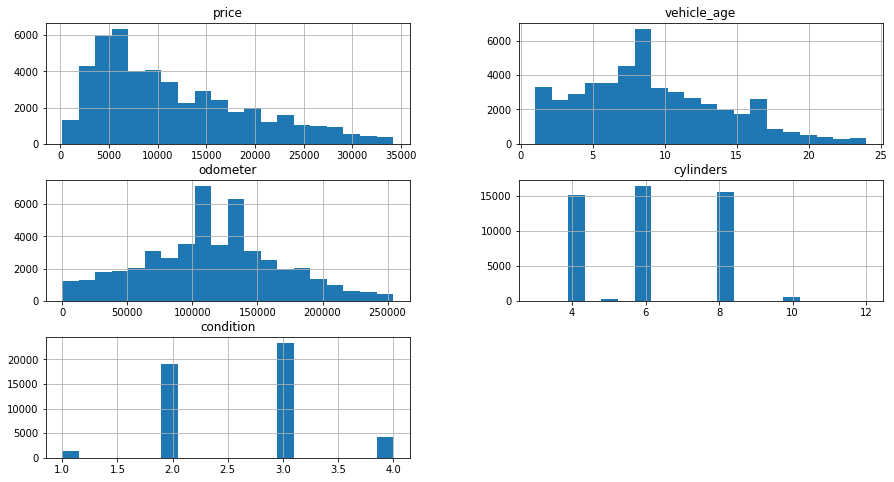

In [76]:
#the new plots
new_df[['price','vehicle_age','odometer','cylinders','condition']].hist(bins=20,figsize=(15,8));

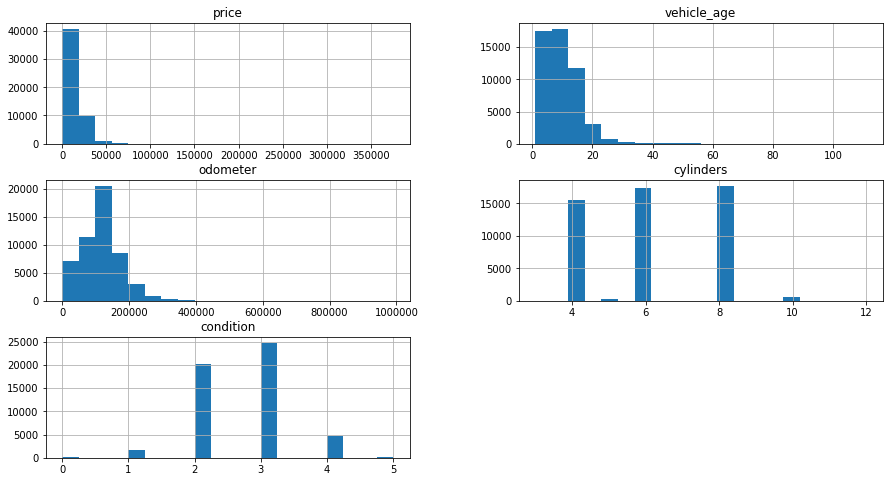

In [77]:
# the earlier ones
df[['price','vehicle_age','odometer','cylinders','condition']].hist(bins=20,figsize=(15,8));

In [78]:
# condition:
# vehicle_age:
# price:
# cylinders:
# odometer:
# model_year:
# is_4wd:
# days_listed:

## Ads lifetime

[Study how many days advertisements were displayed (`days_listed`). Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.]

In [79]:
new_df.days_listed.describe()
new_df.days_listed[new_df.days_listed>39].count() # in reference to mean
new_df.days_listed[new_df.days_listed>33].count() # in reference to median


count    47860.000000
mean        39.547096
std         28.222047
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

19391

23703

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
    
Unfortunately, from now till the end of your code, you have nan values in your calculation.

Can you please have a look at that, so I will be able to check that in the second iteration?

In [80]:
# ads were removed quickly in 46 rows
new_df.date_posted[new_df.days_listed==0].describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                      49
unique                     48
top       2018-08-27 00:00:00
freq                        2
first     2018-05-11 00:00:00
last      2019-04-16 00:00:00
Name: date_posted, dtype: object

In [81]:
# were listed for an abnormally long time.
new_df.date_posted[new_df.days_listed==271].describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                       1
unique                      1
top       2018-05-24 00:00:00
freq                        1
first     2018-05-24 00:00:00
last      2018-05-24 00:00:00
Name: date_posted, dtype: object

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great that you checked a typical lifetime of an ad. Additionally could be helpful to write just one sentence describing your decision.

## Average price per each type of vehicle

[Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.]

In [82]:
Pl_type_mean=new_df.groupby(['type'])['price'].mean().sort_values(ascending=False)
Pl_type_mean

type
bus            18107.428571
truck          15679.974898
pickup         15115.482408
offroad        14410.368132
coupe          14127.748623
convertible    13539.476190
SUV            10851.616363
other          10559.729614
van             9410.562500
wagon           9036.233042
mini-van        8087.577329
sedan           7293.495296
hatchback       7076.013052
Name: price, dtype: float64

type
sedan          11906
SUV            11795
truck          10995
pickup          6196
coupe           1997
wagon           1489
mini-van        1138
hatchback        996
van              576
convertible      336
other            233
offroad          182
bus               21
Name: date_posted, dtype: int64

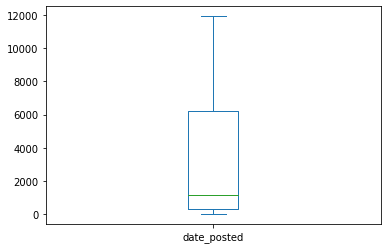

In [83]:
Pl_type_count=new_df.groupby(['type'])['date_posted'].count().sort_values(ascending=False)
Pl_type_count
Pl_type_count.plot(kind='box')
# as shown below  the two types with the greatest number of ads are: SUV & sedan

## Price factors

[What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.]

[Make use of correlation matrix and correlation plots]

In [84]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47860 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         47860 non-null  float64       
 1   model_year    47860 non-null  float64       
 2   model         47860 non-null  object        
 3   condition     47860 non-null  int64         
 4   cylinders     47860 non-null  float64       
 5   fuel          47860 non-null  object        
 6   odometer      47860 non-null  float64       
 7   transmission  47860 non-null  object        
 8   type          47860 non-null  object        
 9   paint_color   47860 non-null  object        
 10  is_4wd        47860 non-null  bool          
 11  date_posted   47860 non-null  datetime64[ns]
 12  days_listed   47860 non-null  int64         
 13  posted_day    47860 non-null  int64         
 14  posted_month  47860 non-null  int64         
 15  posted_year   47860 non-null  int64 

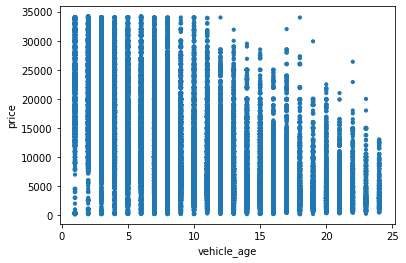

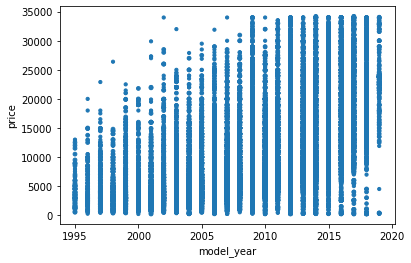

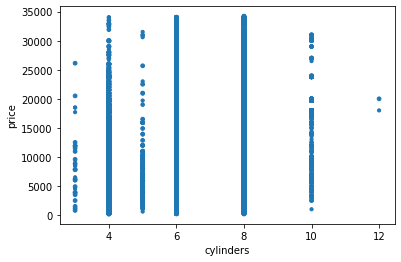

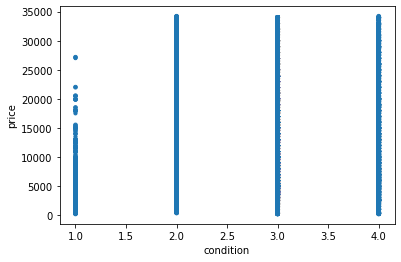

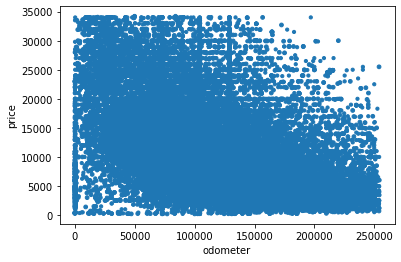

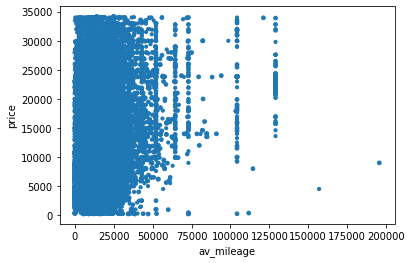

In [85]:
new_df.plot.scatter('vehicle_age','price',s=[10,14]);
new_df.plot.scatter('model_year','price',s=[10,14]);
new_df.plot.scatter('cylinders','price',s=[10,14]);
new_df.plot.scatter('condition','price',s=[10,14]);
new_df.plot.scatter('odometer','price',s=[10,14]);
new_df.plot.scatter('av_mileage','price',s=[10,14]);

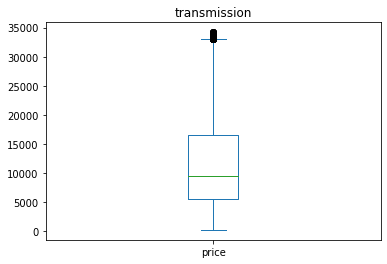

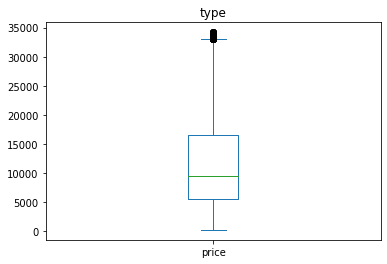

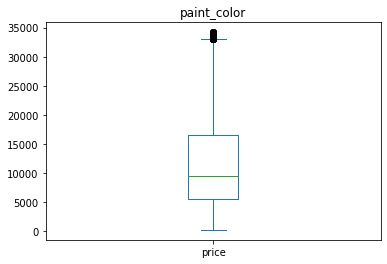

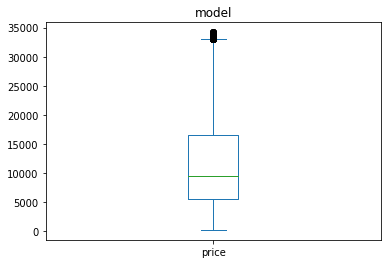

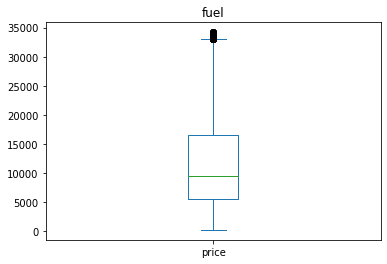

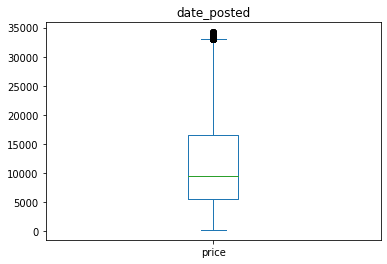

In [86]:
new_df.plot(title='transmission',kind='box',x='transmission',y='price');
new_df.plot(title='type',kind='box',x='type',y='price');
new_df.plot(title='paint_color',kind='box',x='paint_color',y='price');
new_df.plot(title='model',kind='box',x='model',y='price');
new_df.plot(title='fuel',kind='box',x='fuel',y='price');
new_df.plot(title='date_posted',kind='box',x='date_posted',y='price');

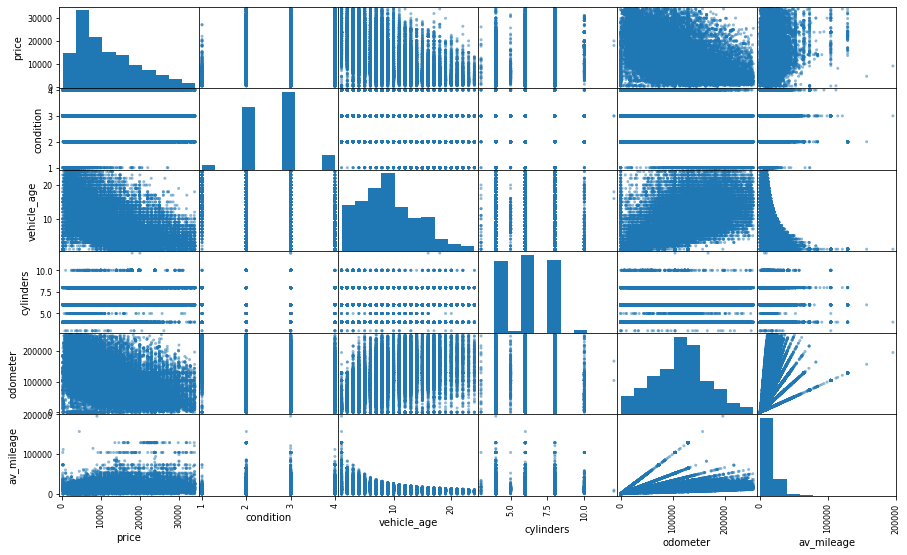

In [87]:
pd.plotting.scatter_matrix(new_df[['price','condition','vehicle_age','cylinders','odometer','av_mileage']], figsize=(15, 9));

In [88]:
round(new_df.corr(),4)

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,posted_day,posted_month,posted_year,vehicle_age,av_mileage
price,1.0000,0.5730,0.2029,0.3527,-0.4710,0.3626,-0.0009,-0.0003,-0.0087,0.0075,-0.5707,0.2292
model_year,0.5730,1.0000,0.2962,-0.1458,-0.5369,-0.0161,-0.0018,0.0006,-0.0189,0.0171,-0.9957,0.4752
condition,0.2029,0.2962,1.0000,-0.0825,-0.3055,-0.0004,0.0014,-0.0121,-0.0051,0.0046,-0.2950,0.0456
cylinders,0.3527,-0.1458,-0.0825,1.0000,0.1117,0.4114,0.0028,-0.0035,0.0014,-0.0009,0.1453,-0.0391
odometer,-0.4710,-0.5369,-0.3055,0.1117,1.0000,0.0534,0.0045,-0.0028,0.0145,-0.0101,0.5345,0.1636
is_4wd,0.3626,-0.0161,-0.0004,0.4114,0.0534,1.0000,0.0035,-0.0012,0.0033,-0.0025,0.0158,0.0305
days_listed,-0.0009,-0.0018,0.0014,0.0028,0.0045,0.0035,1.0000,-0.0011,-0.0117,0.0116,0.0029,-0.0016
posted_day,-0.0003,0.0006,-0.0121,-0.0035,-0.0028,-0.0012,-0.0011,1.0000,0.0332,-0.0625,-0.0064,0.0048
posted_month,-0.0087,-0.0189,-0.0051,0.0014,0.0145,0.0033,-0.0117,0.0332,1.0000,-0.8177,-0.0572,0.0910
posted_year,0.0075,0.0171,0.0046,-0.0009,-0.0101,-0.0025,0.0116,-0.0625,-0.8177,1.0000,0.0760,-0.1093


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Overall an excellent data analysis with correct conclusions and different graph types.

Great that you managed to check correlation of different features. Additionally you can also create a heatmap based on this data.

</div>

## General conclusion

[List your important conclusions in this final section, make sure they include those that led you to the way you processed and analyzed the data. Cover the missing values, duplicates, outliers and possible reasons and solutions for problematic artifacts that you had to address. Don't forget to remove all bracketed comments before submitting your project.]

in this car selling data I had to deal with price rate that influenced by the models' features and their age and the mileage, so that firstly I checked all the locations of all the missing values, and putted a plan carefuly how to clean or fill it so that it will not harm the overall meaning of all the data, and also there was unsuitable data type for the posted_year column, so that I had to convert it into a date type.
the changes I have made to the different columns:<br> <b>
- first of all I checked if there dupplicated rows, and I didn't find.
- is_4wd: filled the missing values with 0, so that we have after, boolean values of 1 & 0.
- model_year: I filled the missing values with the median according to the condition, so I saw it is the most relevant feature to it.
- price: I found many unrealistic price values so I saw to change all the values under $200 to the average value according to the model_year.
- paint_color: in the missing values it is not easy to find a reasonable cause to change them into a specific color, so I added "other" and filled it in them.

and so on I fixed all the rest columns like that.<br>
after that I added some new columns to enrich the presentation and to find better corrultion between all the categorical variables & the other one, and the results showing: <br>
- the most correlation with the price is with model_year and in negatve way with the vehicle_age.


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
- Overall you conducted great research with correct interim findings, clean code and nice visualisation.
- I also like your overall conclusions. It is very structured and provides insights about what you accomplished and recommendations to the business.